[[12.        ]
 [10.07633588]
 [ 0.91603053]
 [-1.92366412]]


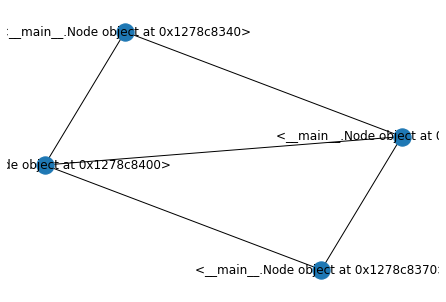

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

def plotTraj(x, y, vx, vy, dt):
    g = 9.8
    t=0
    data  = []
    while y >= 0:
        ay = -g
        y += vy * dt    # use old vy to calculate new y
        vy += ay * dt   # use old ay to calculate new vy
        x += vx * dt
        t += dt
        #print(x, y, t)
        data.append({'x': x, 'y': y, 't': t})
    #print(data)
    df = pd.DataFrame(data)
    #print(df)
    df.plot(kind='scatter', x='x', y='y')
    plt.show()
    df.plot(kind='scatter', x='t', y='x')
    plt.show()
    df.plot(kind='scatter', x='t', y='y')
    plt.show()

class Node:
    v = 0
    

    def __init__(self, type='voltage'):
        self.type = type
        if(type=='gnd'):
            self.v=0
        elif(type=='voltage'):
            self.v=0



class Put:
    v = 0
    z = 0
    type = 'none'

    def __init__(self, type, impedence, value):
        if(type=='voltage'):
            self.v = value
            self.z = impedence
            self.type = 'voltage-source'
        elif(type=='current'):
            self.i = value
            self.z = impedence
            self.type = 'current-source'
        elif(type=='resistor'):
            self.z = impedence
            self.type = 'resistor'
        elif(type=='capacitor'):
            self.c = value
            self.z = impedence
            self.type = 'capacitor'
        elif(type=='inductor'):
            self.h = value
            self.z = impedence
            self.type = 'inductor'




        

    




def getSharedPuts(cycles):
    pair_list = []
    for i, cycle in enumerate(cycles):
        last_node = None
        pairs = []
        for j, node in enumerate(cycle):
            if(j==0):
                first_node = node
            elif(j==len(cycle)-1):
                pairs.append([last_node, node])
                pairs.append([node, first_node])
            else:
                pairs.append([last_node, node])
            last_node = node
        pair_list.append(pairs)
    for pair in pair_list[0]:
        #print(pair, pair_list[1])
        if pair in pair_list[1]:
            print('same', pair)
        if list(reversed(pair)) in pair_list[1]:
            print('reversed', pair)
    #print(pair_list)


cycles = nx.algorithms.cycles.cycle_basis(G, root=node1)
#print(cycles)
#getSharedPuts(cycles)
def cyclerorsomthing():
    for i, cycle in enumerate(cycles):
        loop = []
        last_node = None
        first_node = None
        zs = []
        v=0
        for j, node in enumerate(cycle):
            if(j==0):
                first_node = node
            elif(j==len(cycle)-1):
                put =  G[last_node][node]['put']
                if(put.type == 'voltage-source'):
                    #print(v)
                    v = v+put.v
                elif(put.type == 'resistor'):
                    zs.append(put.z)
                last_put = G[node][first_node]['put']
                if(last_put.type == 'voltage-source'):
                    v = v+last_put.v
                    zs.append(last_put.z)
                    #print(v)
                elif(last_put.type == 'resistor'):
                    zs.append(last_put.z)
            else: 
                put = G[last_node][node]['put']
                if(put.type == 'voltage-source'):
                    v = v+put.v
                    zs.append(put.z)
                elif(put.type == 'resistor'):
                    zs.append(put.z)
            last_node = node
        print(v)
        vs.append(v)
        print(vs)
        matrix.append(zs)
    #print(matrix, vs)







120.0
102.19123505976096
26.294820717131472
45.0


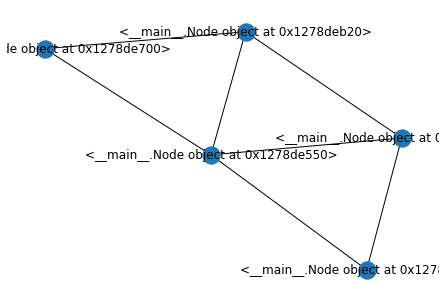

In [61]:
node1 = Node('gnd')
node2 = Node()
node3 = Node()
node4 = Node()
node5 = Node()
put1 = Put('voltage', 0, 120)
put2 = Put('resistor', 1, 0)
put3 = Put('resistor', 10, 0)
put4 = Put('resistor', 10, 0)
put5 = Put('resistor', 1, 0)
put6 = Put('resistor', 1, 0)
put7 = Put('voltage', 0, 45)


G = nx.Graph()
G.add_nodes_from([node1, node2, node3, node4, node5])
G.add_edge(node1, node2, put=put1)
G.add_edge(node2, node3, put=put2)
G.add_edge(node3, node1, put=put3)
G.add_edge(node3, node4, put=put4)
G.add_edge(node4, node1, put=put5)
G.add_edge(node4, node5, put = put6)
G.add_edge(node5, node1, put=put7)

#list(nx.connected_components(G))
#nx.clustering(G)
nx.draw(G, with_labels=True)

matrix = []
vs = []


non_gnd_nodes = list(d for n,d in enumerate(G.nodes()) if d.type=='voltage')
#print(non_gnd_nodes)

node_count = len(non_gnd_nodes)
v_s_count = 0
v_s_arr = []
for edge in list(G.edges.data('put')):
    if(edge[2].type == 'voltage-source'):
        #print(edge)
        v_s_arr.append(edge)
        v_s_count = v_s_count + 1


addMat = np.zeros((node_count+v_s_count, node_count+v_s_count))

#print(list(G.edges.data('put'))[0][2].z)

for i, nodej in enumerate(non_gnd_nodes):
    for j, nodek in enumerate(non_gnd_nodes):
        if(i==j):
            if(nodej.type != 'gnd'):
                sum_cond = 0
                for edge in G.edges(nodej):
                    if(G[edge[0]][edge[1]]['put'].type=='resistor'):
                        sum_cond = sum_cond + 1/G[edge[0]][edge[1]]['put'].z
                addMat[i][j] = sum_cond
        elif(G.has_edge(nodej, nodek)):
            #print(G[nodej][nodek]['put'].z)
            if(G[nodej][nodek]['put'].type=='resistor'):
                addMat[i][j] = -1/G[nodej][nodek]['put'].z
    for k, v_s in enumerate(v_s_arr):
        #print(v_s)
        if(v_s[0] == nodej):
            addMat[node_count+k][i] = -1
            addMat[i][node_count+k] = -1
        if(v_s[1] == nodej):
            addMat[node_count+k][i] = 1
            addMat[i][node_count+k] = 1
            
#print(addMat)
#print(np.linalg.inv(addMat))


z = np.zeros((1, len(non_gnd_nodes)))
#print(z)
for k, v_s in enumerate(v_s_arr):
    z = np.append(z, v_s[2].v)

vs_is = np.dot(np.linalg.inv(addMat), z)

for i, node in enumerate(non_gnd_nodes):
    node.v = vs_is[i]
    print(node.v)
